In [1]:
#connect to database

import pymysql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




connection = pymysql.connect(
    
    host='192.168.11.6',
    user='root', 
    password='water',
    database='waterdata',
    port=30000)


dt = 0.01

try:
    with connection.cursor() as cursor:
               
        sql1 = ('''  SELECT 
                        `A`.`read_date`, `A`.`meter_no` AS `bl_meter1`, `A`.`bl_ahd` AS `bl_ahd1`, 
                        `B`.`meter_no` AS `bl_meter2`, `B`.`bl_ahd` AS `bl_ahd2`,
                        `C`.`meter_no` AS `meter_no3`, `C`.`sl_read1` AS `sl_read1`
                        
                    FROM   
                        `groundwater` AS `A`  
                    INNER JOIN
                        `groundwater` `B` ON (`B`.`meter_no` = "GW967137.2.2" AND `B`.`read_date` = `A`.`read_date` )
                    INNER JOIN
                        `surfacewater` `C` ON (`C`.`meter_no` = "CF419051" AND `C`.`read_date` = `A`.`read_date` )
                    
                    WHERE  
                        `A`.`meter_no` = "GW967137.1.1" AND `A`.`read_date` > '2017-11-30'
                    ''')
        
        
        sql2 = ('''  SELECT 
                        `A`.`read_date`, `A`.`meter_no` AS `bl_meter1`, `A`.`bl_ahd` AS `bl_ahd1`, 
                        `B`.`meter_no` AS `bl_meter2`, `B`.`bl_ahd` AS `bl_ahd2`,
                        `C`.`meter_no` AS `meter_no3`, `C`.`sl_read1` AS `sl_read1`
                        
                    FROM   
                        `groundwater` AS `A`  
                    INNER JOIN
                        `groundwater` `B` ON (`B`.`meter_no` = "GW967138.2.2" AND `B`.`read_date` = `A`.`read_date` )
                    INNER JOIN
                        `surfacewater` `C` ON (`C`.`meter_no` = "CF419051" AND `C`.`read_date` = `A`.`read_date` )
                    
                    WHERE  
                        `A`.`meter_no` = "GW967138.1.1" AND `B`.`bl_ahd` > 0 AND `A`.`read_date` > '2017-11-30'
                    ''')
        
        
        
        sql3 = ('''  SELECT 
                        `A`.`read_date`, `A`.`meter_no` AS `bl_meter1`, `A`.`bl_ahd` AS `bl_ahd1`, 
                        `B`.`meter_no` AS `bl_meter2`, `B`.`bl_ahd` AS `bl_ahd2`,
                        `C`.`meter_no` AS `meter_no3`, `C`.`sl_read1` AS `sl_read1`,
                        `D`.`meter_no` AS `meter_no4`, `D`.`rf_read1` AS `rf_read1`
                    FROM   
                        `groundwater` AS `A`  
                    INNER JOIN
                        `groundwater` `B` ON (`B`.`meter_no` = "GW967137.2.2" AND `B`.`read_date` = `A`.`read_date` )
                    INNER JOIN
                        `surfacewater` `C` ON (`C`.`meter_no` = "CF419051" AND `C`.`read_date` = `A`.`read_date` )
                    INNER JOIN
                        `rainfall` `D` ON (`D`.`meter_no` = "54151" AND `D`.`read_date` = `A`.`read_date` )
                    WHERE  
                        `A`.`meter_no` = "GW967137.1.1" AND `A`.`read_date` > '2017-11-30'
                    ''')
        
   
    
    df1_orig = pd.read_sql_query(sql1, connection, parse_dates=['read_date','%Y-%m-%d'], coerce_float=True)  ## , index_col="A.read_date"
    df2_orig = pd.read_sql_query(sql2, connection, parse_dates=['read_date','%Y-%m-%d'], coerce_float=True)
    
    

     
  
except:
    print("Error: unable to convert the data")
connection.close()


In [15]:
#filter out incomplete rows from the groundwater series start date
        
df1 = df1_orig[df1_orig['read_date'] >= '2005-11-17']                              # Elfin Crossing Data
df2 = df2_orig[df2_orig['read_date'] >= '2007-09-06']                              # Green Gully Data


#calculate the bore level change for 1 day, 1 week and 1 month

# setup date deltas

day_0 = (df1['read_date'])

day_1 = (day_0) - pd.DateOffset(days=1)
day_7 = (day_0) - pd.DateOffset(days=7)
day_14 = (day_0) - pd.DateOffset(days=14)
day_30 = (day_0) - pd.DateOffset(days=30)


#Elfin

# correct data types

df1['bl_ahd1'] = pd.to_numeric(df1['bl_ahd1'] )
df1['bl_ahd2'] = pd.to_numeric(df1['bl_ahd2'])
df1['sl_read1'] = pd.to_numeric(df1['sl_read1'])

#calculate change in bore levels for each date delta

# GW967137.1.1
                                
E_bl_ahd1_dt1 = df1['bl_ahd1'].shift(-1) - df1['bl_ahd1']
E_bl_ahd1_dt7 = df1['bl_ahd1'].shift(-7) - df1['bl_ahd1']
E_bl_ahd1_dt14 = df1['bl_ahd1'].shift(-14) - df1['bl_ahd1']
E_bl_ahd1_dt30 = df1['bl_ahd1'].shift(-30) - df1['bl_ahd1']


# GW967137.2.2

E_bl_ahd2_dt1 = df1['bl_ahd2'].shift(-1) - df1['bl_ahd2']
E_bl_ahd2_dt7 = df1['bl_ahd2'].shift(-7) - df1['bl_ahd2']
E_bl_ahd2_dt14 = df1['bl_ahd2'].shift(-14) - df1['bl_ahd2']
E_bl_ahd2_dt30 = df1['bl_ahd2'].shift(-30) - df1['bl_ahd2']


# 419051 - surface water

E_sl_read1_dt1 = df1['sl_read1'].shift(-1) - df1['sl_read1']
E_sl_read1_dt7 = df1['sl_read1'].shift(-7) - df1['sl_read1']
E_sl_read1_dt14 = df1['sl_read1'].shift(-14) - df1['sl_read1']
E_sl_read1_dt30 = df1['sl_read1'].shift(-30) - df1['sl_read1']

#insert deltas into data frames


df1.insert(7, 'bl_ahd1_dt1', E_bl_ahd1_dt1)
df1.insert(8, 'bl_ahd2_dt1', E_bl_ahd2_dt1)
df1.insert(9, 'sl_read1_dt1', E_sl_read1_dt1)
df1.insert(10, 'bl_ahd1_dt7', E_bl_ahd1_dt7)
df1.insert(11, 'bl_ahd2_dt7', E_bl_ahd2_dt7)
df1.insert(12, 'sl_read1_dt7', E_sl_read1_dt7)
df1.insert(13, 'bl_ahd1_dt14', E_bl_ahd1_dt14)
df1.insert(14, 'bl_ahd2_dt14', E_bl_ahd2_dt14)
df1.insert(15, 'sl_read1_dt14', E_sl_read1_dt14)
df1.insert(16, 'bl_ahd1_dt30', E_bl_ahd1_dt30)
df1.insert(17, 'bl_ahd2_dt30', E_bl_ahd2_dt30)
df1.insert(18, 'sl_read1_dt30', E_sl_read1_dt30)




#Green Gully

# correct data types

df2['bl_ahd1'] = pd.to_numeric(df2['bl_ahd1'] )
df2['bl_ahd2'] = pd.to_numeric(df2['bl_ahd2'])


#calculate change in bore levels for each date delta

# GW967138.1.1

GG_bl_ahd1_dt1 = df2['bl_ahd1'].shift(-1) - df2['bl_ahd1']
GG_bl_ahd1_dt7 = df2['bl_ahd1'].shift(-7) - df2['bl_ahd1']
GG_bl_ahd1_dt14 = df2['bl_ahd1'].shift(-14) - df2['bl_ahd1']
GG_bl_ahd1_dt30 = df2['bl_ahd1'].shift(-30) - df2['bl_ahd1']

# GW967138.2.2

GG_bl_ahd2_dt1 = df2['bl_ahd2'].shift(-1) - df2['bl_ahd2']
GG_bl_ahd2_dt7 = df2['bl_ahd2'].shift(-7) - df2['bl_ahd2']
GG_bl_ahd2_dt14 = df2['bl_ahd2'].shift(-14) - df2['bl_ahd2']
GG_bl_ahd2_dt30 = df2['bl_ahd2'].shift(-30) - df2['bl_ahd2']


# 419051 - surface water

GG_sl_read1_dt1 = df2['sl_read1'].shift(-1) - df2['sl_read1']
GG_sl_read1_dt7 = df2['sl_read1'].shift(-7) - df2['sl_read1']
GG_sl_read1_dt14 = df2['sl_read1'].shift(-14) - df2['sl_read1']
GG_sl_read1_dt30 = df2['sl_read1'].shift(-30) - df2['sl_read1']

#insert deltas into data frames


df2.insert(7, 'bl_ahd1_dt1', GG_bl_ahd1_dt1)
df2.insert(8, 'bl_ahd2_dt1', GG_bl_ahd2_dt1)
df2.insert(9, 'sl_read1_dt1', GG_sl_read1_dt1)
df2.insert(10, 'bl_ahd1_dt7', GG_bl_ahd1_dt7)
df2.insert(11, 'bl_ahd2_dt7', GG_bl_ahd2_dt7)
df2.insert(12, 'sl_read1_dt7', GG_sl_read1_dt7)
df2.insert(13, 'bl_ahd1_dt14', GG_bl_ahd1_dt14)
df2.insert(14, 'bl_ahd2_dt14', GG_bl_ahd2_dt14)
df2.insert(15, 'sl_read1_dt14', GG_sl_read1_dt14)
df2.insert(16, 'bl_ahd1_dt30', GG_bl_ahd1_dt30)
df2.insert(17, 'bl_ahd2_dt30', GG_bl_ahd2_dt30)
df2.insert(18, 'sl_read1_dt30', GG_sl_read1_dt30)



t1  = df1['read_date']

a1 = df1['bl_ahd1']
a2 = df1['bl_ahd2']
a3 = df2['bl_ahd1']
a4 = df2['bl_ahd2']
s1 = df1['bl_ahd1_dt14'].to_numpy(dtype='float', na_value=np.nan,copy=True)
s2 = df1['bl_ahd2_dt14'].to_numpy(dtype='float', na_value=np.nan,copy=True)
s3 = df1['sl_read1_dt14'].to_numpy(dtype='float', na_value=np.nan,copy=True)

t2  = df2['read_date']
          
s4 = df2['bl_ahd1_dt14'].to_numpy(dtype='float', na_value=np.nan,copy=True)
s5 = df2['bl_ahd2_dt14'].to_numpy(dtype='float', na_value=np.nan,copy=True)
s6 = df2['sl_read1_dt14'].to_numpy(dtype='float', na_value=np.nan,copy=True)

#df1.head()


df1.describe()



<class 'numpy.ndarray'>


,bl_ahd1,bl_ahd2,sl_read1,bl_ahd1_dt1,bl_ahd2_dt1,sl_read1_dt1,bl_ahd1_dt7,bl_ahd2_dt7,sl_read1_dt7,bl_ahd1_dt14,bl_ahd2_dt14,sl_read1_dt14,bl_ahd1_dt30,bl_ahd2_dt30,sl_read1_dt30
count,1177.000000,1177.000000,1177.000000,1176.000000,1176.000000,1176.000000,1170.000000,1170.000000,1170.000000,1163.000000,1163.000000,1163.000000,1147.000000,1147.000000,1147.000000
mean,252.167520,250.757113,0.133948,-0.000056,-0.000392,0.000102,-0.000375,-0.002861,0.000621,-0.000628,-0.005547,0.001136,-0.000821,-0.011573,0.002133
std,0.534616,0.438379,0.088350,0.029627,0.010471,0.059292,0.116192,0.034093,0.085106,0.169669,0.050430,0.094960,0.253207,0.086099,0.096608
min,251.081000,249.964000,0.000000,-0.042000,-0.024000,-0.976000,-0.155000,-0.078000,-1.073000,-0.237000,-0.090000,-1.191000,-0.322000,-0.134000,-1.203000
25%,251.734000,250.399000,0.079000,-0.004000,-0.005000,0.000000,-0.028000,-0.022000,0.000000,-0.053000,-0.038000,0.000000,-0.108000,-0.074000,0.000000
50%,252.237000,250.770000,0.079000,-0.003000,-0.001000,0.000000,-0.020000,-0.010000,0.000000,-0.039000,-0.022000,0.000000,-0.083000,-0.052000,0.000000
75%,252.625000,251.101000,0.194000,-0.001000,0.003250,0.000000,-0.007000,0.010000,0.000000,-0.011000,0.020000,0.000000,0.058500,0.034000,0.001000
max,253.092000,251.656000,1.391000,0.806000,0.152000,1.312000,1.515000,0.316000,1.312000,1.486000,0.298000,1.312000,1.772000,0.331000,1.312000


In [3]:
df2.describe()

,bl_ahd1,bl_ahd2,sl_read1,bl_ahd1_dt1,bl_ahd2_dt1,sl_read1_dt1,bl_ahd1_dt7,bl_ahd2_dt7,sl_read1_dt7,bl_ahd1_dt14,bl_ahd2_dt14,sl_read1_dt14,bl_ahd1_dt30,bl_ahd2_dt30,sl_read1_dt30
count,1177.000000,1177.000000,1177.000000,1176.000000,1176.000000,1176.000000,1170.000000,1170.000000,1170.000000,1163.000000,1163.000000,1163.000000,1147.000000,1147.000000,1147.000000
mean,280.705111,278.603138,0.133948,-0.000141,-0.000808,0.000102,-0.000620,-0.005731,0.000621,-0.000155,-0.013271,0.001136,0.005303,-0.026360,0.002133
std,0.872792,0.589512,0.088350,0.137071,0.091081,0.059292,0.415226,0.096533,0.085106,0.555768,0.083522,0.094960,0.744539,0.124098,0.096608
min,279.481000,276.879000,0.000000,-0.449000,-2.190000,-0.976000,-1.754000,-2.175000,-1.073000,-2.058000,-2.156000,-1.191000,-2.307000,-2.041000,-1.203000
25%,279.966000,278.141000,0.079000,-0.009000,-0.006000,0.000000,-0.040750,-0.027000,0.000000,-0.074500,-0.052000,0.000000,-0.150000,-0.110000,0.000000
50%,280.720000,278.604000,0.079000,-0.005000,-0.002000,0.000000,-0.030000,-0.013000,0.000000,-0.053000,-0.028000,0.000000,-0.102000,-0.060000,0.000000
75%,281.207000,278.911000,0.194000,-0.001000,0.003000,0.000000,-0.012000,0.012000,0.000000,-0.025000,0.023000,0.000000,-0.052000,0.033500,0.001000
max,284.075000,280.070000,1.391000,3.359000,2.204000,1.312000,4.566000,2.235000,1.312000,4.487000,0.227000,1.312000,4.594000,0.336000,1.312000


<AxesSubplot:title={'center':'Green Gully Ground Water Depth over Time'}, xlabel='Date', ylabel='AHD(m)'>

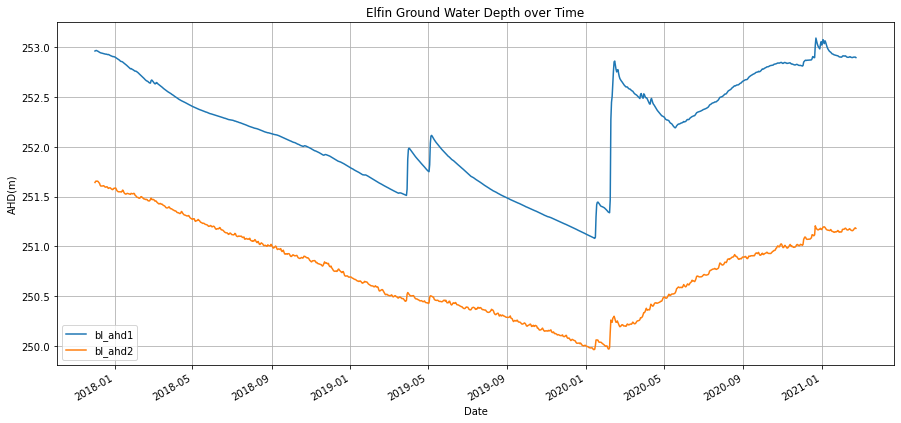

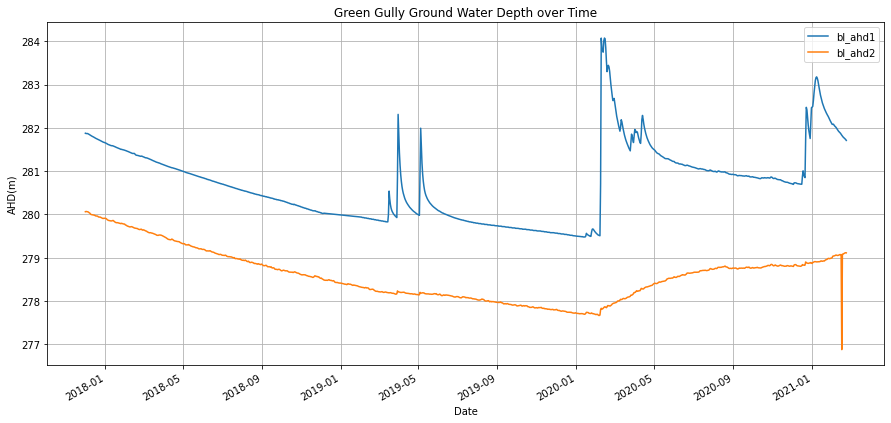

In [4]:
df1.plot(x='read_date', y=['bl_ahd1','bl_ahd2'],figsize=(15,7), grid=True, title='Elfin Ground Water Depth over Time', xlabel='Date',ylabel='AHD(m)')
df2.plot(x='read_date', y=['bl_ahd1','bl_ahd2'],figsize=(15,7), grid=True, title='Green Gully Ground Water Depth over Time', xlabel='Date',ylabel='AHD(m)')

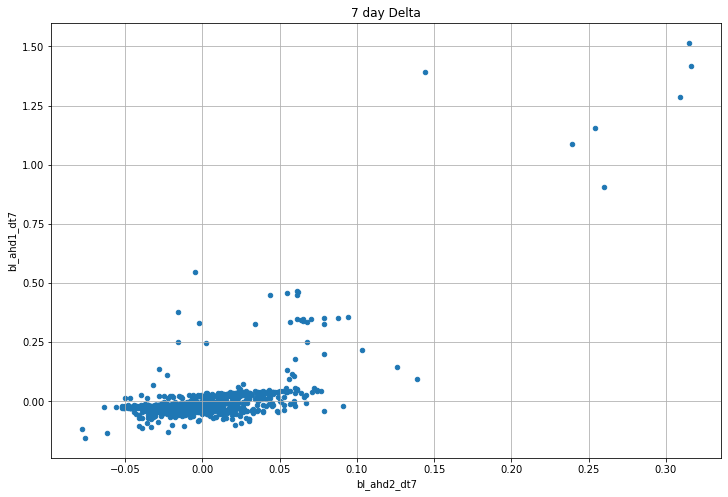

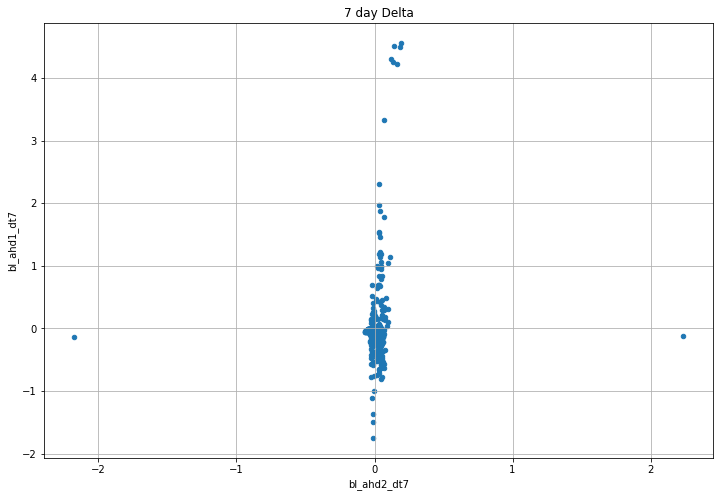

In [5]:
df1.plot.scatter(x='bl_ahd2_dt7', y='bl_ahd1_dt7', figsize=(12, 8), title="7 day Delta", xlabel="GW967137.2.2", ylabel='GW967137.1.1',grid=True)
df2.plot.scatter(x='bl_ahd2_dt7', y='bl_ahd1_dt7', figsize=(12, 8), title="7 day Delta", xlabel='GW967138.2.2', ylabel='GW967138.1.1', grid=True)

plt.show()

In [6]:
df1['bl_ahd2_dt7'].cov(df1['bl_ahd1_dt7'])


0.0028275912402301747

In [7]:
df2['bl_ahd2_dt7'].cov(df2['bl_ahd1_dt7'])

0.004765445844574863

In [8]:
df1['bl_ahd2_dt7'].corr(df1['bl_ahd1_dt7'])

0.7138006713617269

In [9]:
df2['bl_ahd2_dt7'].corr(df2['bl_ahd1_dt7'])

0.11888986361626873

In [10]:
df1.cov()

,bl_ahd1,bl_ahd2,sl_read1,bl_ahd1_dt1,bl_ahd2_dt1,sl_read1_dt1,bl_ahd1_dt7,bl_ahd2_dt7,sl_read1_dt7,bl_ahd1_dt14,bl_ahd2_dt14,sl_read1_dt14,bl_ahd1_dt30,bl_ahd2_dt30,sl_read1_dt30
bl_ahd1,0.285814,0.177983,0.026938,-0.000482,0.000279,-0.001258,-0.007038,0.001795,-0.004517,-0.014876,0.004147,-0.005392,-0.032695,0.009410,-0.007871
bl_ahd2,0.177983,0.192176,0.007037,-0.000772,-0.000312,-0.000256,-0.007067,-0.002465,-0.001628,-0.014508,-0.004890,-0.002410,-0.031426,-0.011200,-0.004489
sl_read1,0.026938,0.007037,0.007806,0.000399,0.000050,-0.001746,0.000289,0.000388,-0.003554,-0.000297,0.000948,-0.004389,-0.000504,0.002739,-0.004453
bl_ahd1_dt1,-0.000482,-0.000772,0.000399,0.000878,0.000157,0.000931,0.001640,0.000168,-0.000032,0.001459,0.000081,-0.000305,0.001760,0.000203,-0.000199
bl_ahd2_dt1,0.000279,-0.000312,0.000050,0.000157,0.000110,0.000227,0.000476,0.000146,0.000153,0.000434,0.000163,0.000051,0.000523,0.000260,0.000120
sl_read1_dt1,-0.001258,-0.000256,-0.001746,0.000931,0.000227,0.003516,0.001495,0.000237,0.002021,0.001415,0.000190,0.001843,0.001395,0.000170,0.001834
bl_ahd1_dt7,-0.007038,-0.007067,0.000289,0.001640,0.000476,0.001495,0.013500,0.002828,0.004664,0.014395,0.002452,0.000918,0.015769,0.003032,0.001774
bl_ahd2_dt7,0.001795,-0.002465,0.000388,0.000168,0.000146,0.000237,0.002828,0.001162,0.001338,0.003242,0.001275,0.000438,0.003539,0.001890,0.000808
sl_read1_dt7,-0.004517,-0.001628,-0.003554,-0.000032,0.000153,0.002021,0.004664,0.001338,0.007243,0.005579,0.001184,0.004507,0.005128,0.000994,0.003823
bl_ahd1_dt14,-0.014876,-0.014508,-0.000297,0.001459,0.000434,0.001415,0.014395,0.003242,0.005579,0.028788,0.005689,0.006496,0.030058,0.005768,0.003177


In [11]:
df2.cov()

,bl_ahd1,bl_ahd2,sl_read1,bl_ahd1_dt1,bl_ahd2_dt1,sl_read1_dt1,bl_ahd1_dt7,bl_ahd2_dt7,sl_read1_dt7,bl_ahd1_dt14,bl_ahd2_dt14,sl_read1_dt14,bl_ahd1_dt30,bl_ahd2_dt30,sl_read1_dt30
bl_ahd1,0.761765,0.257018,0.054249,-0.009548,0.001168,-0.003937,-0.086895,0.008583,-0.014681,-0.154589,0.015126,-0.016895,-0.270493,0.030387,-0.020124
bl_ahd2,0.257018,0.347524,0.010155,-0.002543,-0.004946,-0.000204,-0.020356,-0.010299,-0.001684,-0.038955,-0.013318,-0.002800,-0.075684,-0.029462,-0.005721
sl_read1,0.054249,0.010155,0.007806,-0.000821,0.000127,-0.001746,-0.007113,0.001003,-0.003554,-0.012713,0.001751,-0.004389,-0.016199,0.003921,-0.004453
bl_ahd1_dt1,-0.009548,-0.002543,-0.000821,0.018788,0.000354,0.004854,0.021248,0.000394,0.002081,0.018769,0.000337,0.000942,0.013871,0.000867,0.000953
bl_ahd2_dt1,0.001168,-0.004946,0.000127,0.000354,0.008296,0.000084,0.000671,0.004262,0.000108,0.000432,0.000209,0.000019,0.000333,0.000396,0.000059
sl_read1_dt1,-0.003937,-0.000204,-0.001746,0.004854,0.000084,0.003516,0.005220,0.000083,0.002021,0.004892,0.000064,0.001843,0.004170,0.000075,0.001834
bl_ahd1_dt7,-0.086895,-0.020356,-0.007113,0.021248,0.000671,0.005220,0.172412,0.004765,0.022418,0.154399,0.005130,0.009796,0.127257,0.008201,0.008397
bl_ahd2_dt7,0.008583,-0.010299,0.001003,0.000394,0.004262,0.000083,0.004765,0.009319,0.000668,0.003653,0.001330,0.000037,0.001959,0.002714,0.000296
sl_read1_dt7,-0.014681,-0.001684,-0.003554,0.002081,0.000108,0.002021,0.022418,0.000668,0.007243,0.021096,0.000583,0.004507,0.015916,0.000724,0.003823
bl_ahd1_dt14,-0.154589,-0.038955,-0.012713,0.018769,0.000432,0.004892,0.154399,0.003653,0.021096,0.308878,0.008507,0.030878,0.256090,0.013375,0.015871


In [12]:
df1_corr = df1.corr(method='spearman')

In [16]:
df1_corr

<class 'pandas.core.frame.DataFrame'>


<AxesSubplot:>

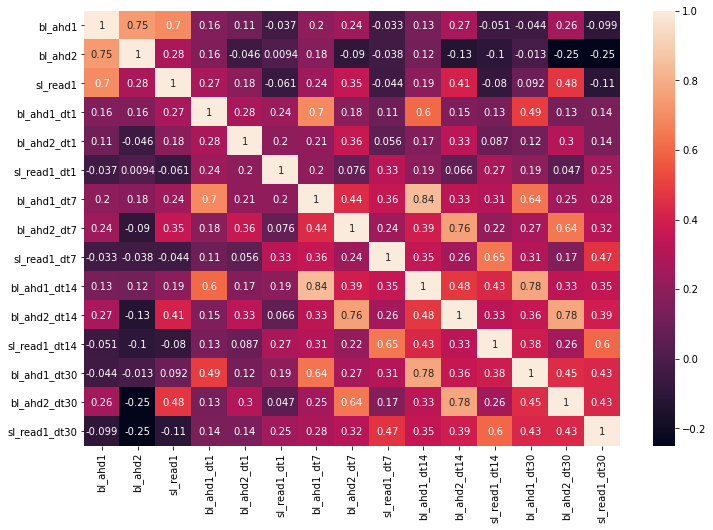

In [14]:
plt.figure(figsize=(12, 8))

sns.heatmap(df1_corr, annot=True)

In [31]:
df2_corr = df2.corr(method='spearman')

df2_corr

,bl_ahd1,bl_ahd2,sl_read1,bl_ahd1_dt1,bl_ahd2_dt1,sl_read1_dt1,bl_ahd1_dt7,bl_ahd2_dt7,sl_read1_dt7,bl_ahd1_dt14,bl_ahd2_dt14,sl_read1_dt14,bl_ahd1_dt30,bl_ahd2_dt30,sl_read1_dt30
bl_ahd1,1.000000,0.632453,0.658550,-0.336794,0.134572,-0.143598,-0.502014,0.181513,-0.197084,-0.551618,0.112716,-0.219487,-0.628920,0.029065,-0.160939
bl_ahd2,0.632453,1.000000,0.296475,-0.082334,-0.172942,-0.012217,-0.277932,-0.351713,-0.077426,-0.363567,-0.468679,-0.140252,-0.411674,-0.553011,-0.258386
sl_read1,0.658550,0.296475,1.000000,-0.104028,0.237993,-0.095513,-0.183158,0.368299,-0.123486,-0.201761,0.371742,-0.160367,-0.206654,0.359147,-0.118418
bl_ahd1_dt1,-0.336794,-0.082334,-0.104028,1.000000,0.119237,0.186900,0.518117,-0.064157,0.030014,0.398637,-0.087295,0.016348,0.323044,-0.090175,0.007556
bl_ahd2_dt1,0.134572,-0.172942,0.237993,0.119237,1.000000,0.121381,0.078420,0.474639,0.052785,0.069329,0.446400,0.095874,0.028559,0.430202,0.208250
sl_read1_dt1,-0.143598,-0.012217,-0.095513,0.186900,0.121381,1.000000,0.175497,0.009550,0.337196,0.188658,0.003232,0.277329,0.188383,0.028697,0.251177
bl_ahd1_dt7,-0.502014,-0.277932,-0.183158,0.518117,0.078420,0.175497,1.000000,0.207175,0.336707,0.807478,0.144363,0.240242,0.682264,0.167028,0.243113
bl_ahd2_dt7,0.181513,-0.351713,0.368299,-0.064157,0.474639,0.009550,0.207175,1.000000,0.174189,0.186073,0.841404,0.186275,0.153041,0.796671,0.364793
sl_read1_dt7,-0.197084,-0.077426,-0.123486,0.030014,0.052785,0.337196,0.336707,0.174189,1.000000,0.315536,0.160934,0.622737,0.300050,0.176844,0.436395
bl_ahd1_dt14,-0.551618,-0.363567,-0.201761,0.398637,0.069329,0.188658,0.807478,0.186073,0.315536,1.000000,0.261643,0.332450,0.809466,0.280694,0.273068


<AxesSubplot:>

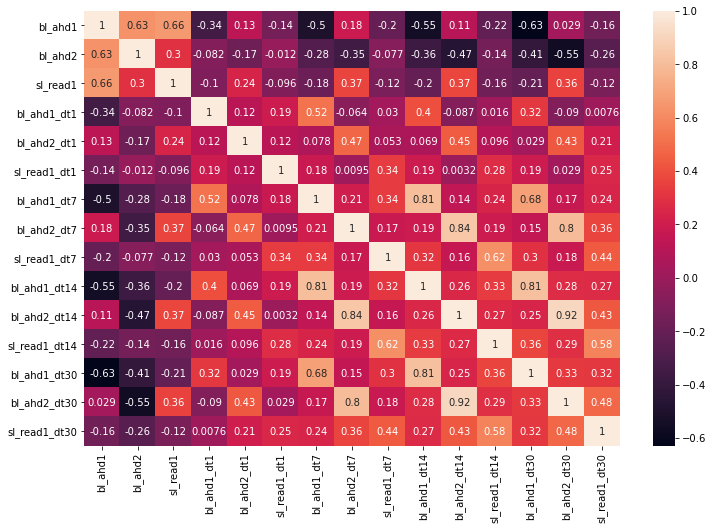

In [32]:


plt.figure(figsize=(12, 8))

sns.heatmap(df2_corr, annot=True)